# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

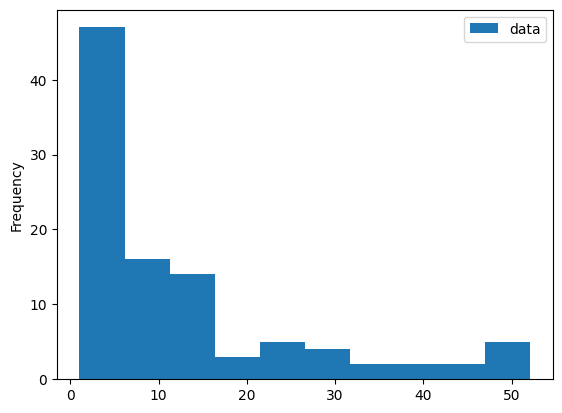

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

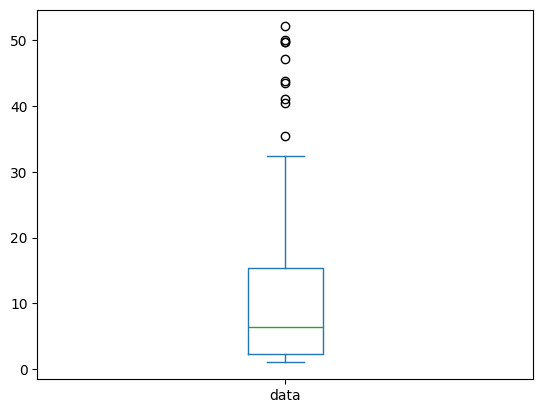

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\luank\Documents\BU\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
cybersecurity_data_path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")
print("Path to dataset files:", cybersecurity_data_path)

csv_file = os.path.join(cybersecurity_data_path, "cybersecurity_attacks.csv")
if os.path.exists(csv_file):
    print(f"File already exists: {csv_file}")
    cybersecurity_data = pd.read_csv(csv_file)
else:
    print(f"File not found, please check the dataset or download process: {csv_file}")

unsw_data_path = kagglehub.dataset_download("dhoogla/unswnb15")
print("Path to dataset files:", unsw_data_path)

csv_file = os.path.join(unsw_data_path, "UNSW_NB15_training-set.parquet")
if os.path.exists(csv_file):
    print(f"File already exists: {csv_file}")
    unsw_data = pd.read_parquet(csv_file)
else:
    print(f"File not found, please check the dataset or download process: {csv_file}")


Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\21
File already exists: C:\Users\luank\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\21\cybersecurity_attacks.csv
Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\dhoogla\unswnb15\versions\5
File already exists: C:\Users\luank\.cache\kagglehub\datasets\dhoogla\unswnb15\versions\5\UNSW_NB15_training-set.parquet


Summary statistics for cybersecurity data:
                  mean  median   min     max     mode
Packet Length   781.45  782.00  64.0  1500.0  1037.00
Anomaly Scores   50.11   50.34   0.0   100.0    15.39


c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


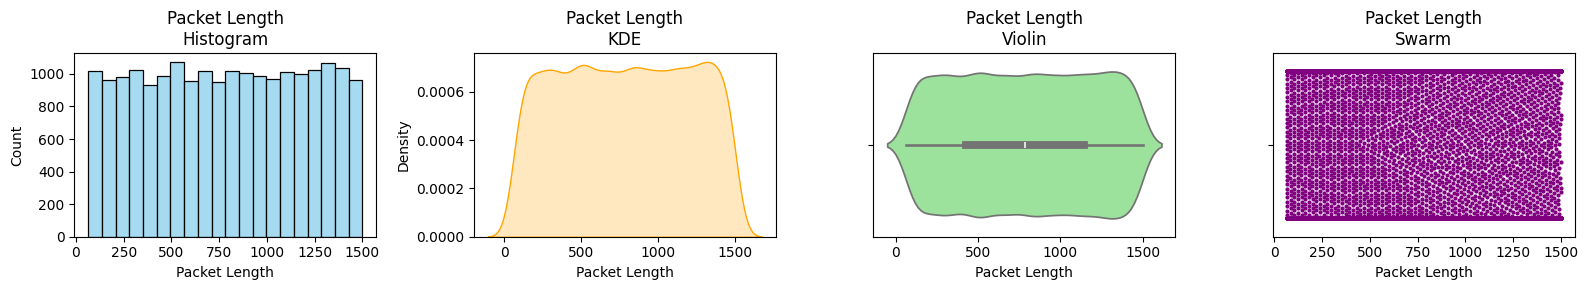

c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


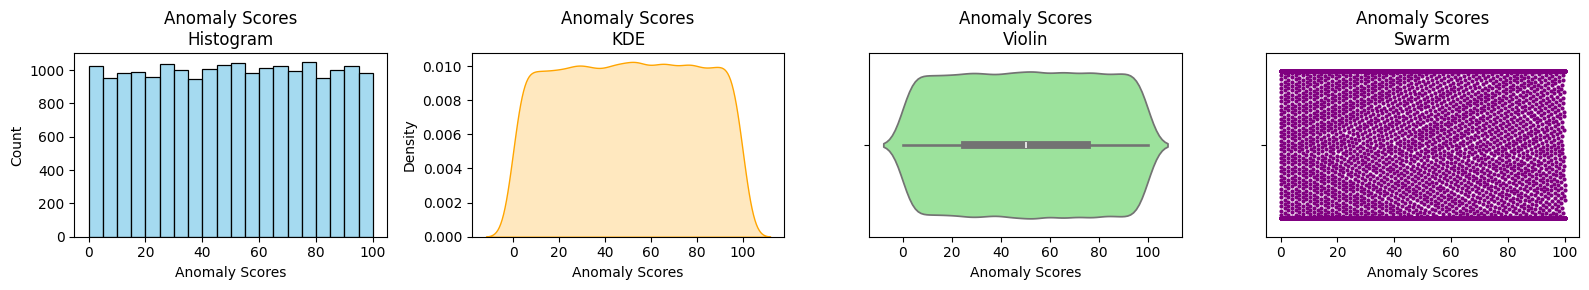

In [6]:
cols_of_interest = ["Packet Length", "Anomaly Scores"]


sample_size = 20000
sample_cybersecurity_data = cybersecurity_data.sample(n=sample_size, random_state=42)

# 1) Summary statistics
print("Summary statistics for cybersecurity data:")
stats = cybersecurity_data[cols_of_interest].agg(["mean", "median", "min", "max"]).T
stats["mode"] = cybersecurity_data[cols_of_interest].mode().iloc[0]
print(stats.round(2))

for col in cols_of_interest:
    fig, axes = plt.subplots(1, 4, figsize=(16, 3))
    
    sns.histplot(sample_cybersecurity_data[col], bins=20, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{col}\nHistogram")
    
    sns.kdeplot(sample_cybersecurity_data[col], fill=True, ax=axes[1], color="orange")
    axes[1].set_title(f"{col}\nKDE")
    
    sns.violinplot(x=sample_cybersecurity_data[col], ax=axes[2], color="lightgreen")
    axes[2].set_title(f"{col}\nViolin")
    
    sns.swarmplot(x=sample_cybersecurity_data[col], ax=axes[3], size=3, color="purple")
    axes[3].set_title(f"{col}\nSwarm")
    
    plt.tight_layout()
    plt.show()

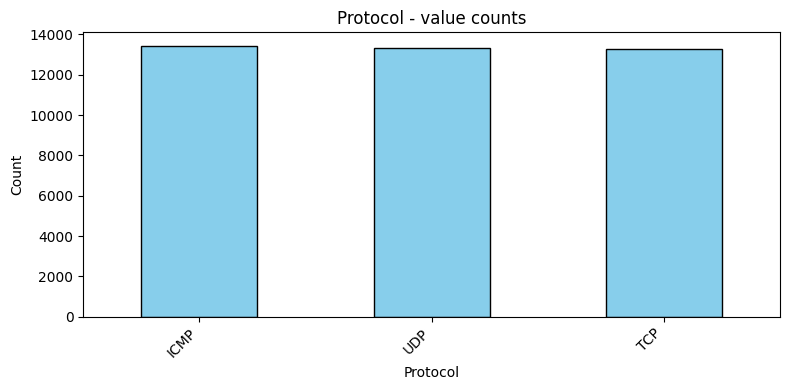

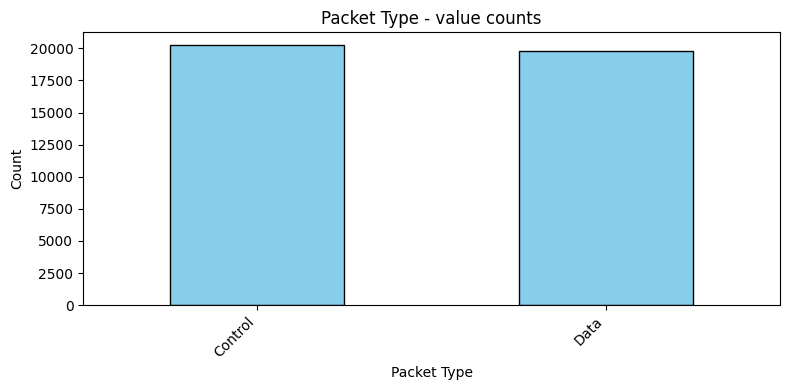

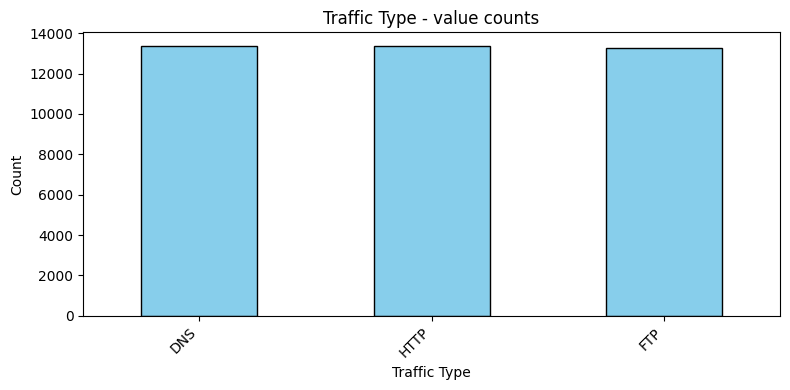

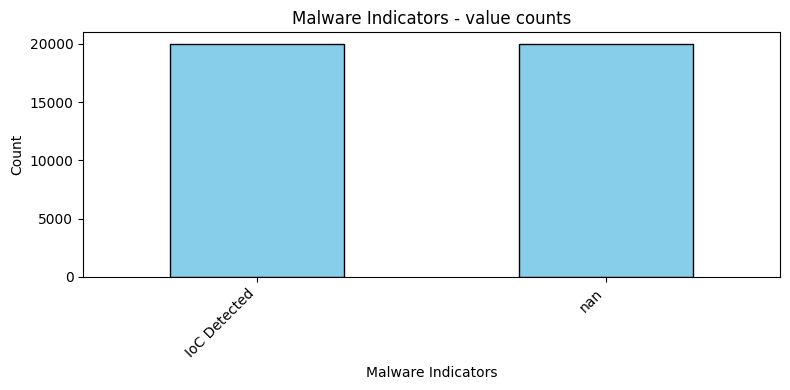

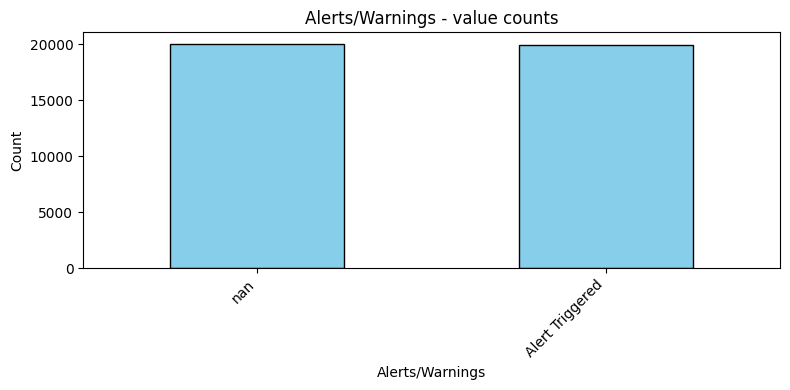

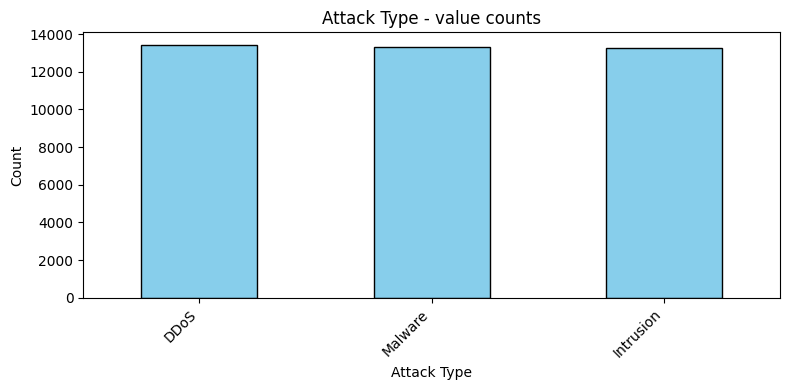

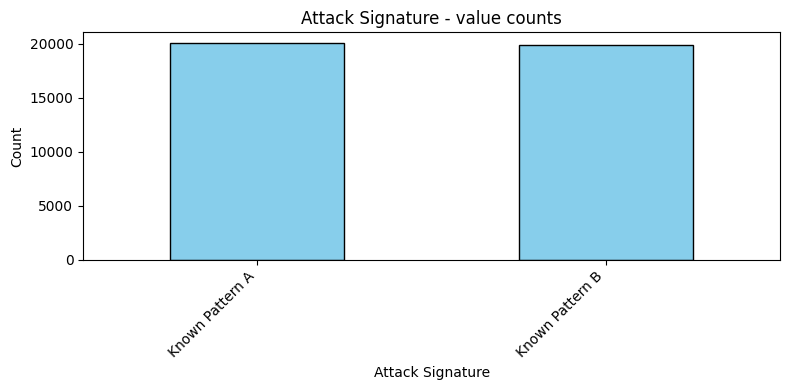

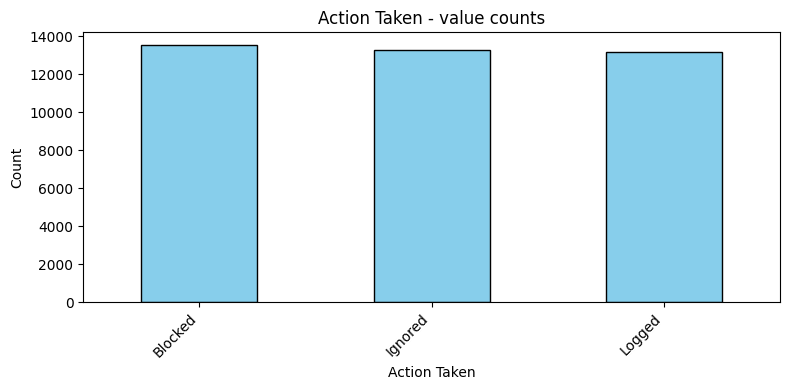

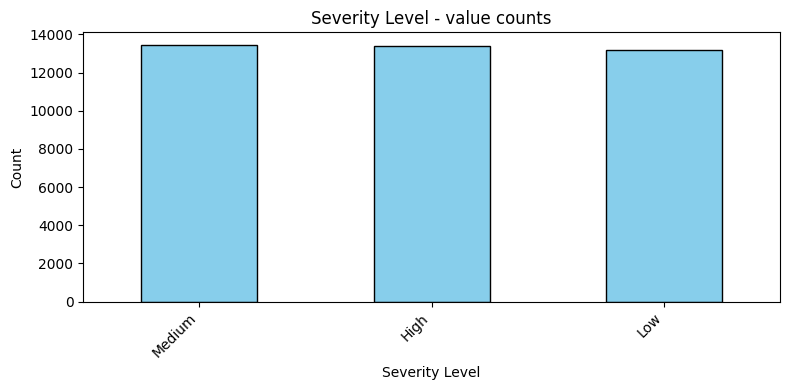

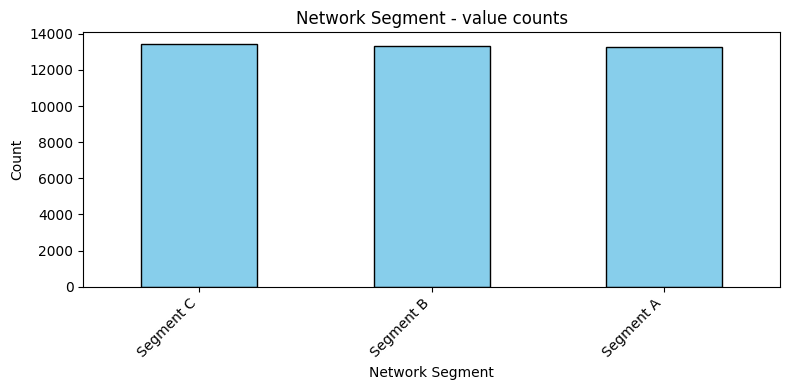

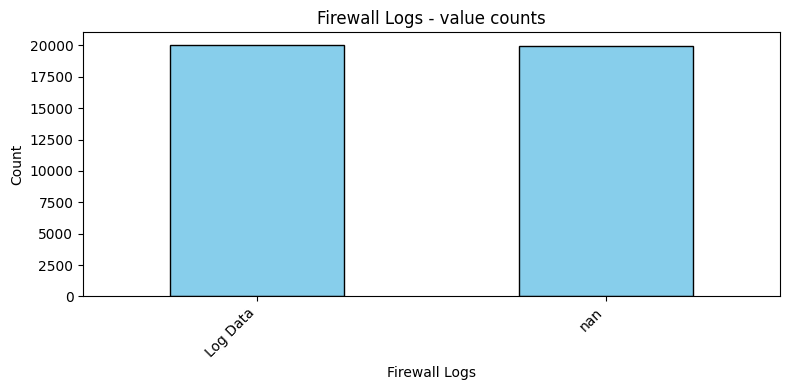

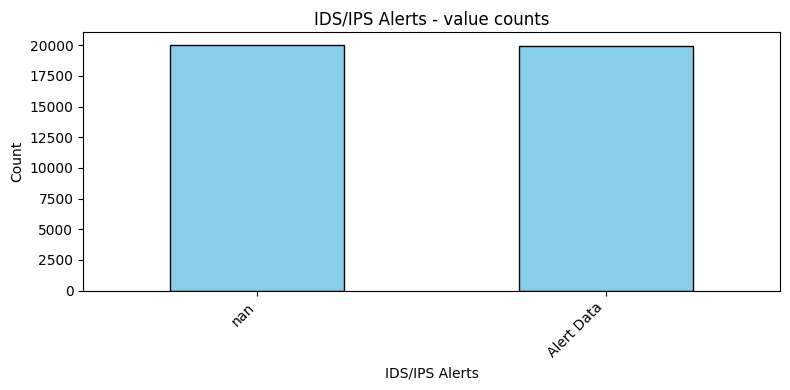

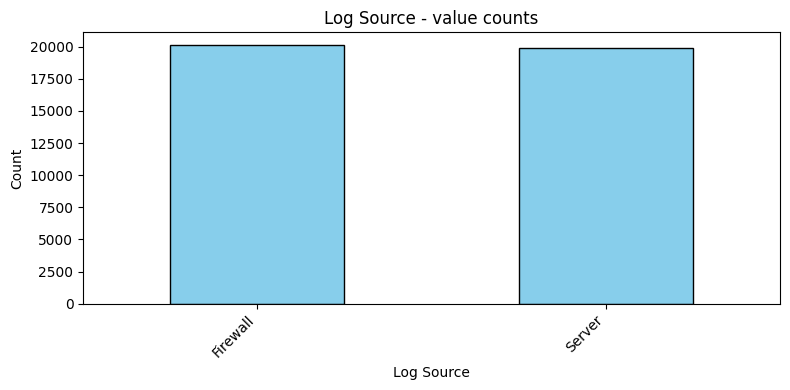

In [7]:
cat = cybersecurity_data.select_dtypes(include="object").drop(columns=["Timestamp", "Source IP Address", "Destination IP Address", "Payload Data", "User Information", "Device Information", "Geo-location Data", "Proxy Information"])
for col in cat.columns:
    counts = cybersecurity_data[col].value_counts(dropna=False)
    plt.figure(figsize=(8, 4))
    counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"{col} - value counts")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
cols_of_interest = ["spkts", "dpkts", "is_ftp_login", "label"]
sample_size = 10000
sample_unsw_data = unsw_data.sample(n=sample_size, random_state=42)

# 1) Summary statistics
print("Summary statistics for USNW data:")
stats = unsw_data[cols_of_interest].agg(["mean", "median", "min", "max"]).T
stats["mode"] = unsw_data[cols_of_interest].mode().iloc[0]
print(stats.round(2))

for col in cols_of_interest:
    fig, axes = plt.subplots(1, 4, figsize=(16, 3))
    
    sns.histplot(sample_unsw_data[col], bins=20, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{col}\nHistogram")
    
    sns.kdeplot(sample_unsw_data[col], fill=True, ax=axes[1], color="orange")
    axes[1].set_title(f"{col}\nKDE")
    
    sns.violinplot(x=sample_unsw_data[col], ax=axes[2], color="lightgreen")
    axes[2].set_title(f"{col}\nViolin")
    
    sns.swarmplot(x=sample_unsw_data[col], ax=axes[3], size=3, color="purple")
    axes[3].set_title(f"{col}\nSwarm")
    
    plt.tight_layout()
    plt.show()

Summary statistics for USNW data:
               mean  median  min      max  mode
spkts         20.30     2.0  1.0   9616.0     2
dpkts         18.97     2.0  0.0  10974.0     0
is_ftp_login   0.01     0.0  0.0      4.0     0
label          0.68     1.0  0.0      1.0     1


c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [ ]:
# Plots for the UNSW_NB15 dataset (using a sample for performance)
cols_of_interest = ["spkts", "dpkts", "is_ftp_login", "label"]  # update as needed

sample_size = 10000
sample_unsw_data = unsw_data.sample(n=min(sample_size, len(unsw_data)), random_state=42)

for col in cols_of_interest:
    fig, axes = plt.subplots(1, 4, figsize=(16, 3))
    
    sns.histplot(sample_unsw_data[col], bins=20, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{col}\nHistogram")
    
    sns.kdeplot(sample_unsw_data[col], fill=True, ax=axes[1], color="orange")
    axes[1].set_title(f"{col}\nKDE")
    
    sns.violinplot(x=sample_unsw_data[col], ax=axes[2], color="lightgreen")
    axes[2].set_title(f"{col}\nViolin")
    
    sns.swarmplot(x=sample_unsw_data[col], ax=axes[3], size=3, color="purple")
    axes[3].set_title(f"{col}\nSwarm")
    
    plt.tight_layout()

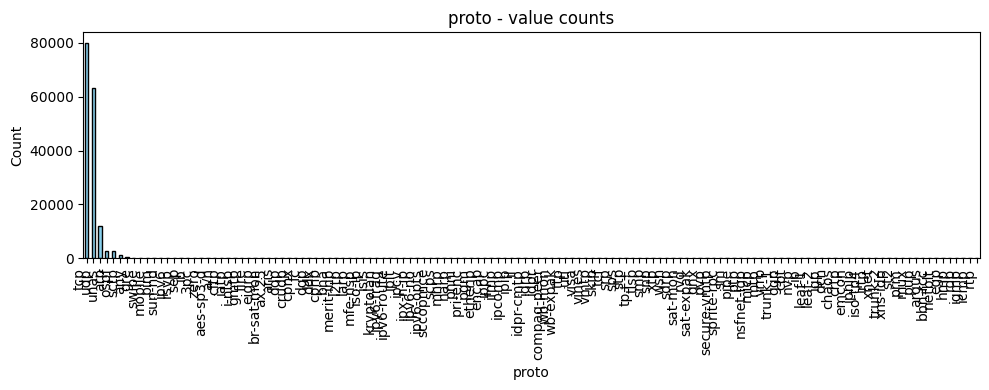

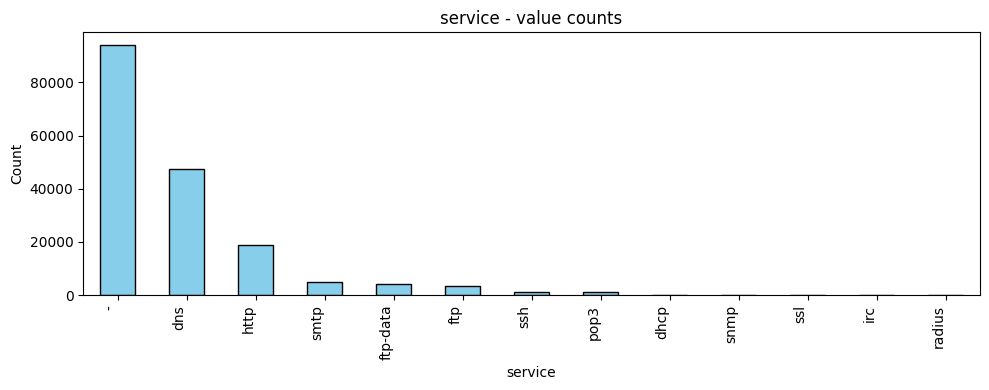

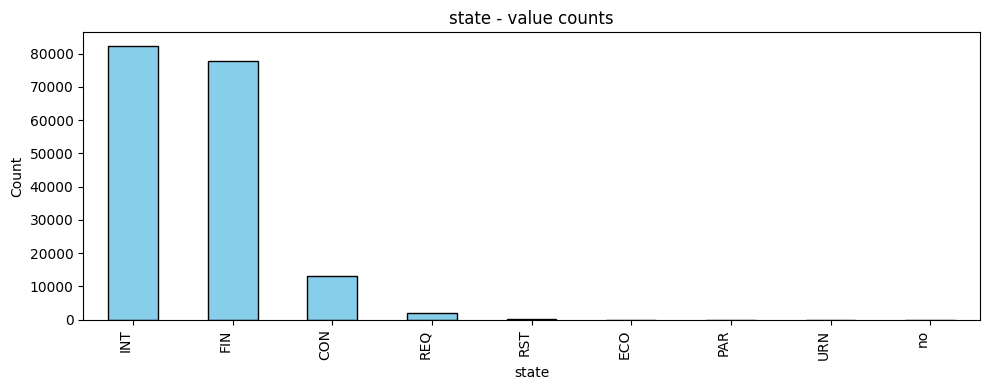

In [ ]:
cats = ["proto", "service", "state"]
for col in cats:
    counts = unsw_data[col].value_counts(dropna=False)
    plt.figure(figsize=(10, 4))
    counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"{col} - value counts")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

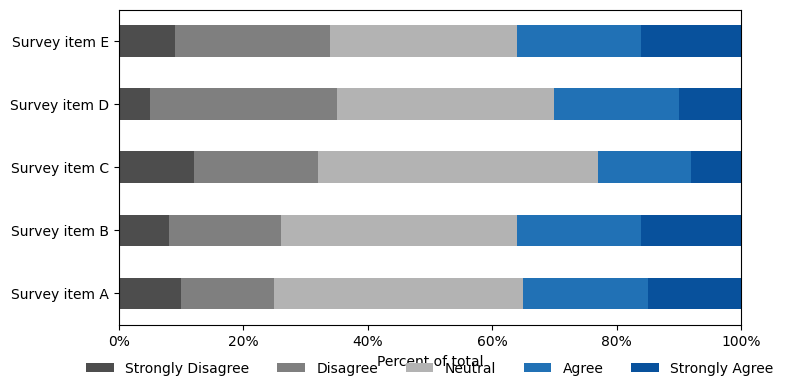

In [ ]:
data = {
    "Strongly Disagree": [10, 8, 12, 5, 9],
    "Disagree":           [15,18,20,30,25],
    "Neutral":            [40,38,45,35,30],
    "Agree":              [20,20,15,20,20],
    "Strongly Agree":     [15,16, 8,10,16],
}
items = ["Survey item A","Survey item B","Survey item C","Survey item D","Survey item E"]
df_likert = pd.DataFrame(data, index=items)

# 2) Plot
colors = ["#4D4D4D","#7F7F7F","#B3B3B3","#2171B5","#08519C"]
fig, ax = plt.subplots(figsize=(8,4))
df_likert.plot.barh(stacked=True, color=colors, ax=ax)

# 3) Formatting
ax.set_xlim(0,100)
ax.set_xticks(range(0,101,20))
ax.set_xticklabels([f"{x}%" for x in range(0,101,20)])
ax.set_xlabel("Percent of total")
ax.set_ylabel("")
ax.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2),
          ncol=5, frameon=False)
plt.tight_layout()
plt.show()